In [1]:
suppressMessages(library(anndataR))
suppressMessages(library(Seurat))

In [2]:
in_dir <- '../../results/05_fibroblast/01_clustering'
out_dir <- '../../results/05_fibroblast/19_find_marker'

if(!dir.exists(out_dir)){
    dir.create(out_dir, recursive = TRUE)

}

In [3]:
adata = anndataR::read_h5ad(glue::glue("{in_dir}/fibroblast.h5ad"))

In [4]:
adata

AnnData object with n_obs × n_vars = 38895 × 15275
    obs: 'patient_id', 'condition', 'cell_type', 'data', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'sub_clusters'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [7]:
# convert data to Seurat object
counts <- t(as.matrix(adata$layers$counts))
colnames(counts) <- adata$obs_names
rownames(counts) <- adata$var_names

metadata <- as.data.frame(adata$obs)
obj <- CreateSeuratObject(counts = counts, assay = "RNA")
obj <- AddMetaData(obj, metadata)

# add PCA and UMAP
df_pca <- as.matrix(adata$obsm$X_pca_harmony)
rownames(df_pca) <- adata$obs_names

df_umap <- as.matrix(adata$obsm$X_umap)
rownames(df_umap) <- adata$obs_names

obj[["PCA"]] <- CreateDimReducObject(embeddings = df_pca, 
                                             key = "PCA_", 
                                             assay = DefaultAssay(obj))

obj[["UMAP"]] <- CreateDimReducObject(embeddings = df_umap, 
                                             key = "UMAP_", 
                                             assay = DefaultAssay(obj))

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 4.4 GiB”
Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”
Warning message:
“No columnames present in cell embeddings, setting to 'PCA_1:50'”
Warning message:
“No columnames present in cell embeddings, setting to 'UMAP_1:2'”


In [8]:
obj

An object of class Seurat 
15275 features across 38895 samples within 1 assay 
Active assay: RNA (15275 features, 0 variable features)
 1 layer present: counts
 2 dimensional reductions calculated: PCA, UMAP

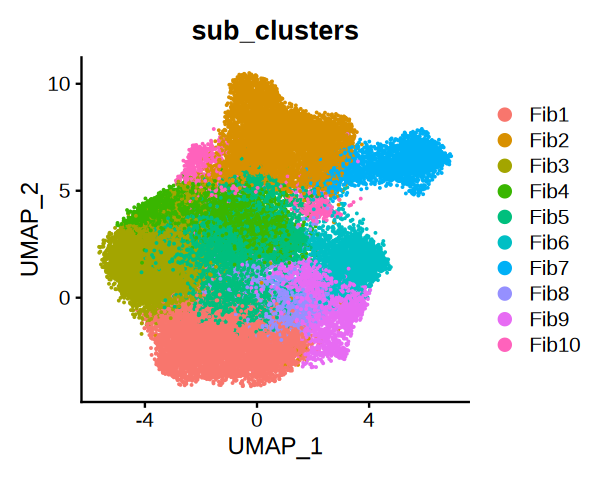

In [9]:
options(repr.plot.height = 4, repr.plot.width = 5)

DimPlot(obj, group.by = "sub_clusters")

In [10]:
obj <- NormalizeData(obj)

Normalizing layer: counts



In [11]:
Idents(obj) <- "sub_clusters"

In [13]:
markers <- FindAllMarkers(obj, assay = "RNA", min.pct = 0.01, only.pos = TRUE)

Calculating cluster Fib1

Calculating cluster Fib2

Calculating cluster Fib3

Calculating cluster Fib4

Calculating cluster Fib5

Calculating cluster Fib6

Calculating cluster Fib7

Calculating cluster Fib8

Calculating cluster Fib9

Calculating cluster Fib10



In [14]:
markers <- subset(markers, p_val_adj < 0.05)

In [16]:
write.csv(markers, glue::glue("{out_dir}/markers.csv"), row.names=FALSE)

In [17]:
head(markers)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
WISP2,0,2.085640,0.823,0.363,0,Fib1,WISP2
SCARA5,0,1.913916,0.737,0.298,0,Fib1,SCARA5
MFAP5,0,1.967593,0.839,0.408,0,Fib1,MFAP5
CLEC3B,0,2.270556,0.619,0.196,0,Fib1,CLEC3B
PI16,0,2.001502,0.663,0.264,0,Fib1,PI16
CD55,0,2.410789,0.618,0.221,0,Fib1,CD55
